In [6]:
import pandas
import matplotlib.pyplot as plt
import numpy
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
numpy.random.seed(7)

# load the dataset

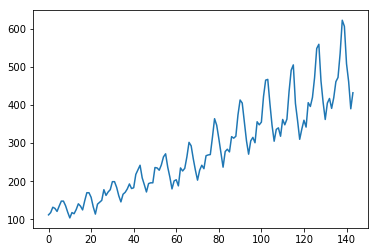

In [10]:
dataframe = pandas.read_csv('data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataframe)
plt.show()
dataset = dataframe.values
dataset = dataset.astype('float32')

# split into train and test sets

In [11]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# convert an array of values into a dataset matrix

In [12]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1

In [14]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model

In [15]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 46137.3361
Epoch 2/200
0s - loss: 32857.3252
Epoch 3/200
0s - loss: 22533.5368
Epoch 4/200
0s - loss: 14646.3958
Epoch 5/200
0s - loss: 9076.0433
Epoch 6/200
0s - loss: 5349.4306
Epoch 7/200
0s - loss: 3069.6312
Epoch 8/200
0s - loss: 1753.2742
Epoch 9/200
0s - loss: 1072.9915
Epoch 10/200
0s - loss: 755.1590
Epoch 11/200
0s - loss: 615.4254
Epoch 12/200
0s - loss: 565.1138
Epoch 13/200
0s - loss: 544.1519
Epoch 14/200
0s - loss: 539.4173
Epoch 15/200
0s - loss: 538.5294
Epoch 16/200
0s - loss: 537.5383
Epoch 17/200
0s - loss: 546.7764
Epoch 18/200
0s - loss: 548.7112
Epoch 19/200
0s - loss: 539.1976
Epoch 20/200
0s - loss: 539.7946
Epoch 21/200
0s - loss: 538.0887
Epoch 22/200
0s - loss: 537.0282
Epoch 23/200
0s - loss: 538.4156
Epoch 24/200
0s - loss: 536.7566
Epoch 25/200
0s - loss: 539.7054
Epoch 26/200
0s - loss: 540.2698
Epoch 27/200
0s - loss: 539.8229
Epoch 28/200
0s - loss: 538.8109
Epoch 29/200
0s - loss: 539.6579
Epoch 30/200
0s - loss: 541.0317
Epoch 

# Estimate model performance

In [17]:
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 532.59 MSE (23.08 RMSE)
Test Score: 2358.07 MSE (48.56 RMSE)


# generate predictions for training

In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Shift predictions back

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions

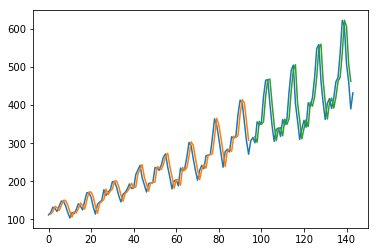

In [21]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()